In [12]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')


from models import ClassificationModel, EmbeddingsModel, SiameseModel
from trainer import SiameseTrainerThreeClass, all_subjects, all_subjects_intense

import numpy as np
from tqdm import tqdm
import csv
import torch

### Siamese training

In [13]:
subjects_test = all_subjects[:1]
subjects_train = [sub for sub in all_subjects_intense if sub not in subjects_test]

In [17]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": all_subjects,
    "subjects_test": subjects_test,
    "intense_dataset_train": False,
    "intense_dataset_test": False,
    "indices1_train": 3,
    "indices2_train": 1,
    "indices1_test": 1,
    "indices2_test": 0,
    "use_regression": False,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 256,
    "batch_size_test": 256,
    "freeze_embed": False,
    "decision_function": 3,
    "filter": [],
    "weight_decay": 0,
    "lr_steps": 10,
    "number_steps": 200,
    "number_steps_testing": 10
}

model_embedding_hyperparameter = {
        "sigmoid": False,
        "dropout": 0.35,
        "layers": [207, 512, 64]
}

if trainer_hyperparameter["use_regression"]:
    head = 1
else:
    head = 2

model_classifier_hyperparameter = {
    "dropout": 0.35,
    "layers": [64, 32],
    "head_type": head
}


#
# head 1 for regression
# head 2 for classification
#

In [18]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

siamese_model = SiameseModel(embedding_model, classifier_model, decision_function=trainer_hyperparameter["decision_function"])

In [19]:
filter = lambda data: data["label"].isin(trainer_hyperparameter["filter"])
trainer = SiameseTrainerThreeClass(trainer_hyperparameter, siamese_model, device="cuda:0", filter=None)

In [20]:
trainer.trainloop(20)

100%|██████████| 20/20 [55:20<00:00, 166.04s/it]

epoch: 1 | train_acc: 0.536 | test_acc: 0.699
epoch: 2 | train_acc: 0.5931 | test_acc: 0.7466
epoch: 3 | train_acc: 0.6089 | test_acc: 0.7595
epoch: 4 | train_acc: 0.619 | test_acc: 0.7731
epoch: 5 | train_acc: 0.6248 | test_acc: 0.7894
epoch: 6 | train_acc: 0.6254 | test_acc: 0.7969
epoch: 7 | train_acc: 0.6295 | test_acc: 0.8179
epoch: 8 | train_acc: 0.6352 | test_acc: 0.7914
epoch: 9 | train_acc: 0.6413 | test_acc: 0.7785
epoch: 10 | train_acc: 0.6391 | test_acc: 0.7989
epoch: 11 | train_acc: 0.6514 | test_acc: 0.8207
epoch: 12 | train_acc: 0.649 | test_acc: 0.8043
epoch: 13 | train_acc: 0.6481 | test_acc: 0.8105
epoch: 14 | train_acc: 0.6538 | test_acc: 0.8186
epoch: 15 | train_acc: 0.6543 | test_acc: 0.8526
epoch: 16 | train_acc: 0.6564 | test_acc: 0.8342
epoch: 17 | train_acc: 0.6579 | test_acc: 0.8329
epoch: 18 | train_acc: 0.6586 | test_acc: 0.8288
epoch: 19 | train_acc: 0.6587 | test_acc: 0.8315
epoch: 20 | train_acc: 0.6596 | test_acc: 0.82


In [21]:
torch.save(siamese_model.state_dict(), "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\ThreeClassSiamese\pretrained_models\model_all.pth")

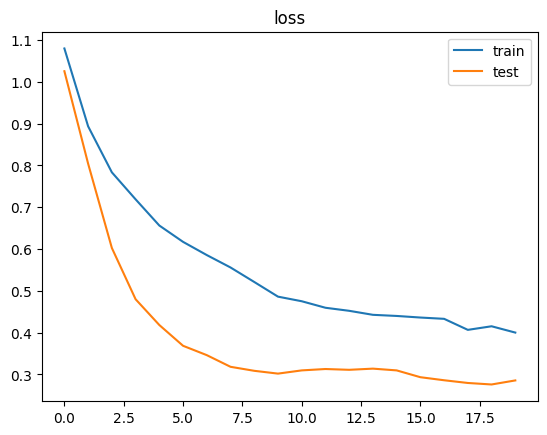

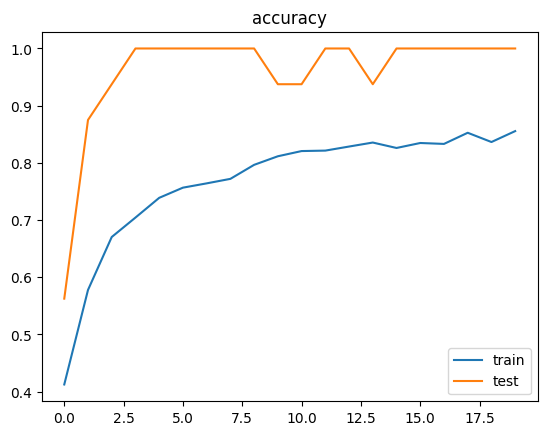

In [7]:
trainer.plot_history()

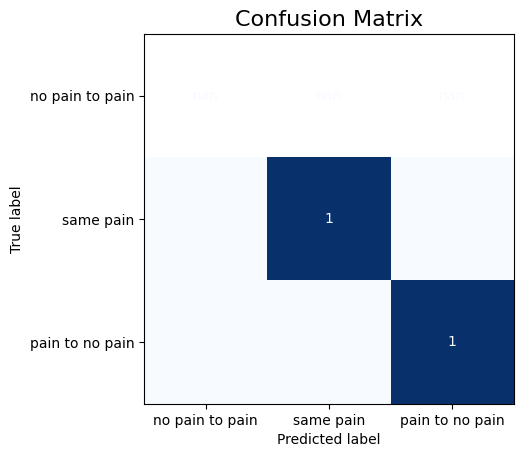

In [8]:
trainer.plot_cm()

### saving file

In [5]:
saving_path = "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\ThreeClassSiamese\\results\\intense_dataset_1_0_1_0.csv"

with open(saving_path, mode='a') as result_file:
    results_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    results_writer.writerow(["subj", "accuracy", "cm", "best_epoch"])

### LOSO - INTENSE

In [7]:
for subj in tqdm(all_subjects_intense):
    subjects_test = [subj]
    subjects_train = [sub for sub in all_subjects_intense if sub not in subjects_test]

    trainer_hyperparameter = {
        "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\INTENSE2\\normalized_subjects.pkl",
        "subjects_train": subjects_train,
        "subjects_test": subjects_test,
        "intense_dataset_train": False,
        "intense_dataset_test": False,
        "indices1_train": 1,
        "indices2_train": 0,
        "indices1_test": 1,
        "indices2_test": 0,
        "use_regression": False,
        "wandb": False,
        "log": True,
        "learning_rate": 0.001,
        "batch_size": 256,
        "batch_size_test": 256,
        "freeze_embed": False,
        "decision_function": 3,
        "filter": [],
        "weight_decay": 0,
        "lr_steps": 10,
        "number_steps": 400,
        "number_steps_testing": 200
    }

    model_embedding_hyperparameter = {
            "sigmoid": False,
            "dropout": 0.35,
            "layers": [207, 512, 64]
    }

    if trainer_hyperparameter["use_regression"]:
        head = 1
    else:
        head=2

    model_classifier_hyperparameter = {
        "dropout": 0.35,
        "layers": [64, 32],
        "head_type": head
    }

    classifier_model = ClassificationModel(model_classifier_hyperparameter)
    embedding_model = EmbeddingsModel(model_embedding_hyperparameter)
    siamese_model = SiameseModel(embedding_model, classifier_model, decision_function=trainer_hyperparameter["decision_function"])
    
    trainer = SiameseTrainerThreeClass(trainer_hyperparameter, siamese_model, device="cuda:0")

    trainer.trainloop(20)

    best_epoch = max(trainer.history, key=lambda x:x['test_acc'])["epoch"]
    cm = trainer.history_cm[best_epoch-1]["cm"]

    acc = trainer.history[best_epoch-1]["test_acc"]

    s = np.sum(cm, axis=1)
    cm = cm.astype('float64')
    cm[0] = cm[0]/s[0]
    cm[1] = cm[1]/s[1]
    cm[2] = cm[2]/s[2]

    with open(saving_path, mode='a') as result_file:
            results_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            results_writer.writerow([subj, acc*100, cm, best_epoch])

100%|██████████| 24/24 [44:10<00:00, 110.42s/it]

epoch: 1 | train_acc: 0.4603 | test_acc: 0.6127
epoch: 2 | train_acc: 0.5756 | test_acc: 0.6275
epoch: 3 | train_acc: 0.6521 | test_acc: 0.6324
epoch: 4 | train_acc: 0.6721 | test_acc: 0.6716
epoch: 5 | train_acc: 0.7055 | test_acc: 0.6667
epoch: 6 | train_acc: 0.7363 | test_acc: 0.6569
epoch: 7 | train_acc: 0.7566 | test_acc: 0.7059
epoch: 8 | train_acc: 0.7811 | test_acc: 0.6667
epoch: 9 | train_acc: 0.8156 | test_acc: 0.6667
epoch: 10 | train_acc: 0.8017 | test_acc: 0.7108
epoch: 11 | train_acc: 0.8356 | test_acc: 0.6863
epoch: 12 | train_acc: 0.8487 | test_acc: 0.6471
epoch: 13 | train_acc: 0.8462 | test_acc: 0.6765
epoch: 14 | train_acc: 0.8519 | test_acc: 0.6863
epoch: 15 | train_acc: 0.8539 | test_acc: 0.6422
epoch: 16 | train_acc: 0.8624 | test_acc: 0.6667
epoch: 17 | train_acc: 0.8682 | test_acc: 0.652
epoch: 18 | train_acc: 0.8733 | test_acc: 0.6716
epoch: 19 | train_acc: 0.8756 | test_acc: 0.6324
epoch: 20 | train_acc: 0.8853 | test_acc: 0.6471


### 10 - Fold - XITE

In [13]:
x=0
subjects_test = all_subjects[x*13:(x+1)*13]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "subjects_test": subjects_test,
    "intense_dataset_train": False,
    "intense_dataset_test": False,
    "indices1_train": 4,
    "indices2_train": 1,
    "indices1_test": 1,
    "indices2_test": 0,
    "use_regression": False,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 256,
    "batch_size_test": 256,
    "freeze_embed": False,
    "decision_function": 3,
    "filter": [],
    "weight_decay": 0,
    "lr_steps": 10,
    "number_steps": 200,
    "number_steps_testing": 100
}

model_embedding_hyperparameter = {
        "sigmoid": False,
        "dropout": 0.35,
        "layers": [207, 512, 64]
}

if trainer_hyperparameter["use_regression"]:
    head = 1
else:
    head=2

model_classifier_hyperparameter = {
    "dropout": 0.35,
    "layers": [64, 32],
    "head_type": head
}

classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)
siamese_model = SiameseModel(embedding_model, classifier_model, decision_function=trainer_hyperparameter["decision_function"])

trainer = SiameseTrainerThreeClass(trainer_hyperparameter, siamese_model, device="cuda:0")

In [14]:
trainer.trainloop(30)

100%|██████████| 30/30 [1:50:36<00:00, 221.21s/it]

epoch: 1 | train_acc: 0.5413 | test_acc: 0.5845
epoch: 2 | train_acc: 0.6034 | test_acc: 0.5955
epoch: 3 | train_acc: 0.6164 | test_acc: 0.5942
epoch: 4 | train_acc: 0.6203 | test_acc: 0.6031
epoch: 5 | train_acc: 0.6299 | test_acc: 0.6031
epoch: 6 | train_acc: 0.6377 | test_acc: 0.604
epoch: 7 | train_acc: 0.6376 | test_acc: 0.6142
epoch: 8 | train_acc: 0.6415 | test_acc: 0.6118
epoch: 9 | train_acc: 0.6447 | test_acc: 0.6129
epoch: 10 | train_acc: 0.6471 | test_acc: 0.6098
epoch: 11 | train_acc: 0.6537 | test_acc: 0.6149
epoch: 12 | train_acc: 0.6551 | test_acc: 0.6224
epoch: 13 | train_acc: 0.66 | test_acc: 0.6207
epoch: 14 | train_acc: 0.6603 | test_acc: 0.6138
epoch: 15 | train_acc: 0.6613 | test_acc: 0.6191
epoch: 16 | train_acc: 0.6648 | test_acc: 0.6203
epoch: 17 | train_acc: 0.6639 | test_acc: 0.6142
epoch: 18 | train_acc: 0.6619 | test_acc: 0.6244
epoch: 19 | train_acc: 0.6647 | test_acc: 0.6145
epoch: 20 | train_acc: 0.6696 | test_acc: 0.6256
epoch: 21 | train_acc: 0.6702 | 

In [15]:
best_epoch = max(trainer.history, key=lambda x:x['test_acc'])["epoch"]
cm = trainer.history_cm[best_epoch-1]["cm"]

acc = trainer.history[best_epoch-1]["test_acc"]

s = np.sum(cm, axis=1)
cm = cm.astype('float64')
cm[0] = cm[0]/s[0]
cm[1] = cm[1]/s[1]
cm[2] = cm[2]/s[2]

In [16]:
acc

0.6278

In [17]:
with open(saving_path, mode='a') as result_file:
    results_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    results_writer.writerow(["split_"+str(x), acc*100, cm, best_epoch])